In [1]:
'''import shutil
import os

shutil.rmtree('jupyterlab-git')
shutil.rmtree('py code')
shutil.rmtree('googlecolab')
os.remove('embedding_in_qt_sgskip.ipynb')'''

In [2]:
#!pip3 install import_ipynb
#!pip3 install mpl_finance

import import_ipynb 
import get_data as get 

import import_ipynb 
import rsi as rs

import import_ipynb 
import macd 

import import_ipynb 
import chaikin as chiOsc

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates 
import matplotlib.ticker as mticker
from dateutil.relativedelta import relativedelta
import os 
import pandas_datareader as web
import matplotlib as mpl
import pylab
from timeit import default_timer as timer

importing Jupyter notebook from get_data.ipynb
importing Jupyter notebook from rsi.ipynb
importing Jupyter notebook from macd.ipynb


/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

importing Jupyter notebook from chaikin.ipynb


Stock to chart:  AAPL





AAPL data already saved in stock_dfs.
Building graph for AAPL....



/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


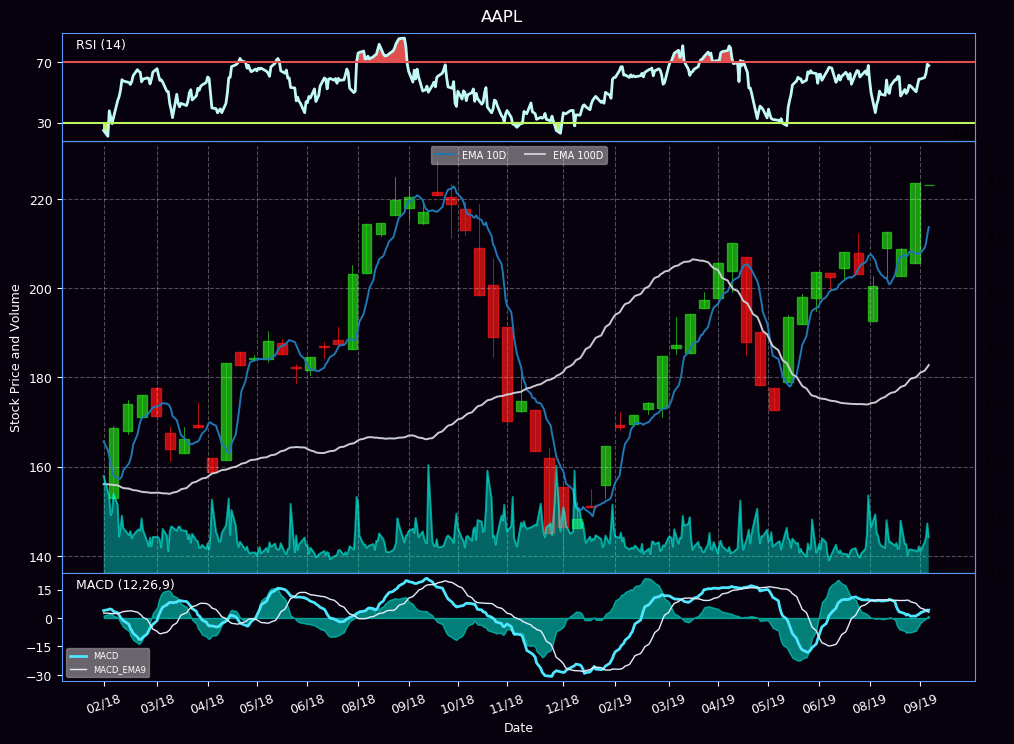


Time taken to run the code: 1.312



In [4]:


def candle_rsi(ticker,ema_fast = 30, ema_slow = 100, years = 3, months = 0, 
               days = 0, rsi_n = 14, nfast = 12, nslow = 26, 
               annotation = False,verbose = True):
    
 """
    Plot 3 graphs in the following order: 
    
    - Plot the RSI whose function is in rsi.ipynb whose value ranges from
    0 to 100. Gives the users an indicator to predict stock price movement
    
    - Plot the time, open, high, low, close as a vertical line ranging
    from low to high.  Use a rectangular bar to represent the
    open-close span.  If close >= open, use colorup to color the bar,
    otherwise use colordown
    
    - On the above chart fast and slow exponential moving averages are 
    drawn for default window being 30 and 100 days respectively
    
    - Volume graph is overlayed on top of candle_stick graph
    
    - Plot of MACD and MACD_EMA9 is plotted at the bottom. The shaded
    graph is the different between MACD and MACD_EMA9 
    
    Parameters
    ----------
    ticker: stock ticker
        to look up a stock on yahoo api
    ema_fast, ema_slow: integer 
        the timeframe for exponential_moving_average() which is set to 30
        and 100 as a default
    years, months, days: integer
        for the use of specified_prices() to give a specified timeframe 
        for plots 
    rsi_n: integer 
        the timeframe for rs.rsiFunc()
    nfast, nslow: integer
        this is the window for MACD plot which is set to 12 and 26 days 
        respectively. 
    annotation: boolean 
        if True, this will give annotation 'Big News!' at the entry [510] 
        randomly. But in the future I will give more annotation so that
        when we have huge price movement, it will alert you. 
    verbose: boolean 
        if my years>10, then if False, the graph will print everything it has
        for the prices.

    Returns
    -------
    ret : graph
        returns a graph and also saves the image in `plots/candle_rsi/ticker` folder
    """  
    
 if years>10 and verbose: 
    print('''In get_data() method, I have only extracted data for the last 10 years, 
    please change the above method for more historic data\nIf you would like to see all the prices plot, 
    then make verbose = False''')
 
   ######## sorting out the data so that code is efficient and doesn't reload when not necessary ################  
 else:
    if os.path.exists('stock_dfs/{}.csv'.format(ticker)):
        data = pd.read_csv('stock_dfs/{}.csv'.format(ticker),
                     parse_dates=True,index_col=0)
        
        if not {'RSI', 'MACD', 'MACD_EMA9'}.issubset(data.columns): 
            rs.rsiFunc(ticker,n=rsi_n);
            macd.computeMACD(ticker,slow = nslow,fast=nfast);
            macd.macd_ema(ticker, n = 9);
            data = pd.read_csv('stock_dfs/{}.csv'.format(ticker),
                 parse_dates=True,index_col=0) 
            print('Adding relative columns to existing {}.csv file'.format(ticker))
        
        else:
            print('')
            print('{} data already saved in stock_dfs.'.format(ticker))

    else: 
        rs.rsiFunc(ticker,n=rsi_n);
        macd.computeMACD(ticker,slow = nslow,fast=nfast);
        macd.macd_ema(ticker, n = 9);
        data = pd.read_csv('stock_dfs/{}.csv'.format(ticker),
                 parse_dates=True,index_col=0)
        print('{} data now saved in stock_dfs folder.'.format(ticker))
        print('')
        
    print('Building graph for {}....\n'.format(ticker))
        
    ###################
    
    ############ filtering data for timeperiod specified by the user ####################################
    df = get.specified_prices(data,years=years,months=months,days=days)   
    
    close = get.specified_prices(df['Adj Close'],years=years,months=months,days=days)
    volume = get.specified_prices(df['Volume'],years=years,months=months,days=days)
    rsi = get.specified_prices(df['RSI'],years=years,months=months,days=days)
    macd_ = get.specified_prices(df['MACD'],years=years,months=months,days=days)
    macd_ema9 = get.specified_prices(df['MACD_EMA9'],years=years,months=months,days=days)
    
    emaF = get.simple_moving_average(close,window = ema_fast)
    emaS = get.exponential_moving_average(close, window = ema_slow)
    
    SP = np.count_nonzero(~np.isnan(emaS.values))  #counting number of non NaN rows
    date = emaS.index[ema_slow-1]  #getting date of first non - NaN number
    
    df_ohlc = close.resample('10D').ohlc()[date:]  #only looking for data starting after ema line
    df_ohlc.reset_index(inplace=True)
    df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
    ###########################
    
    ########### Plotting begins ####################################
    mpl.rcParams.update(mpl.rcParamsDefault)  #to remove plt.style.use and have default setting
    mpl.rcParams.update({'font.size':9})  #specifying the font-size 
    
    fig = plt.figure(figsize=(11,8),facecolor='#07000d') 
    #plt.style.use('ggplot')
    #plt.style.use('dark_background')
    
    ############# so here I plotting the candle_stick and SMA/EMA #######################
    ax1 = plt.subplot2grid((6,1),(1,0),rowspan = 4, colspan = 1,facecolor='#07000d')

    candlestick_ohlc(ax1,df_ohlc.values,width=7,colorup='#27d817',colordown = '#ff1717',alpha = 0.7);
    
    # plotting SMA and EMA 
    ax1.plot(df.index[-SP:],emaF[-SP:],label = 'EMA {}D'.format(ema_fast),linewidth = 1.4)
    ax1.plot(df.index[-SP:],emaS[-SP:],label = 'EMA {}D'.format(ema_slow),linewidth = 1.4,color = '#c8cbd1')
    
    maLeg = ax1.legend(loc = 9, ncol = 2, prop={'size':7},fancybox = True)  #loc = 3, prop={'size':7},fancybox = True
    maLeg.get_frame().set_alpha(0.4) #set the background of legend to shade
    textEd = pylab.gca().get_legend().get_texts()
    pylab.setp(textEd[0:5],color = 'w') #changing the colour of legend to white
    
    plt.setp(ax1.get_xticklabels(),visible = False)  #remove xaxis of ax0
    
    ax1.set_ylabel("Stock Price and Volume",color = 'w');
    ax1.tick_params(axis='y', colors='w')
    
    ax1.grid(True, color='w', linestyle='--', linewidth=0.8,alpha = 0.3)
    
    ax1.spines['bottom'].set_color("#5998ff")
    ax1.spines['top'].set_color("#5998ff")
    ax1.spines['left'].set_color("#5998ff")
    ax1.spines['right'].set_color("#5998ff")
    
    ################# Here I am plotting the rsiFunc() graph on the top ########################
    ax0 = plt.subplot2grid((6,1),(0,0),rowspan = 1, colspan = 1, sharex = ax1,facecolor = '#07000d')
    
    rsicolor = '#c1f9f7'
    negCol = '#e05050' #'#386d13'
    posCol = '#bdf464' # 'g' #'#8f2020'
    
    ax0.plot(rsi.index[-SP:],rsi[-SP:],label = 'RSI {}D'.format(rsi_n),color = rsicolor,linewidth = 2)
    ax0.axhline(y=70,linestyle = '-',color = negCol);
    ax0.axhline(y=30,linestyle = '-', color = posCol);
    
    ax0.fill_between(rsi.index[-SP:],rsi[-SP:],70,where=(rsi[-SP:]>=70),facecolor = negCol,edgecolor=negCol)
    ax0.fill_between(rsi.index[-SP:],rsi[-SP:],30,where=(rsi[-SP:]<=30),facecolor = posCol,edgecolor=posCol)
    
    plt.setp(ax0.get_xticklabels(),visible = False)  #remove xaxis of ax0
        
    #ax0.set_ylabel("RSI",color= 'w')
    ax0.text(0.015,0.95,'RSI ({})'.format(rsi_n),va='top',color = 'w',transform = ax0.transAxes)
    ax0.tick_params(axis='y', colors='w')
    ax0.set_yticks([30,70])
    
    ax0.spines['bottom'].set_color("#5998ff")
    ax0.spines['top'].set_color("#5998ff")
    ax0.spines['left'].set_color("#5998ff")
    ax0.spines['right'].set_color("#5998ff")
    
    ############ To plot volume graph on top of the candle_stick diagram ###############
    volumeMin = 0  #volume.min()

    ax1v = ax1.twinx()
    ax1v.plot(volume.index[-SP:],volume[-SP:],label = 'Volume',color = '#00ffe8',linewidth = 1.4,alpha = 0.6)
    ax1v.fill_between(volume.index[-SP:],volumeMin, volume[-SP:], facecolor = '#00ffe8',alpha=0.4,label = 'Volume')
    
    #let's you adjust the stock prices ticks for x-axis for the dates [start,end,step]
    #ax1v.xaxis.set_ticks(volume.index[np.arange(len(volume)-SP, len(volume), int(len(volume)/20))]) 
    #ax1v.xaxis.set_major_formatter(mdates.DateFormatter("%m-%y"))

    ax1v.set_ylim(0,4*volume.max())  #shrinks the size of volume on the graph
   
    ax1v.grid(False)
    
    ax1v.spines['bottom'].set_color("#5998ff")
    ax1v.spines['top'].set_color("#5998ff")
    ax1v.spines['left'].set_color("#5998ff")
    ax1v.spines['right'].set_color("#5998ff")
    
    #ax1v.legend(loc = 4)  #loc = 3, prop={'size':7},fancybox = True
    #######################################################
    
    ############# To plot MACD and MACD_ema9 ###############################3
    ax2 = plt.subplot2grid((6,1),(5,0),rowspan = 1, colspan = 1, sharex = ax1,facecolor = '#07000d')
    
    fillcolor = '#00ffe8'
    ax2.plot(macd_.index[-SP:],macd_[-SP:],color = '#4ee6fd',label = 'MACD',linewidth = 2)
    ax2.plot(macd_ema9.index[-SP:],macd_ema9[-SP:],color = '#e1edf9',label = 'MACD_EMA9',linewidth = 1)
    ax2.fill_between(macd_.index[-SP:],(macd_-macd_ema9)[-SP:],0,alpha = 0.5, facecolor = fillcolor,edgecolor = fillcolor )
    
    maLeg2 = ax2.legend(loc = 3, ncol = 1, prop={'size':6},fancybox = True)  #loc = 3, prop={'size':7},fancybox = True
    maLeg2.get_frame().set_alpha(0.4) #set the background of legend to shade
    textEd = pylab.gca().get_legend().get_texts()
    pylab.setp(textEd[0:5],color = 'w') #changing the colour of legend to white
    
    ax2.set_xlabel("Date",color= 'w')
    ax2.tick_params(axis='x', colors='w')
    
    plt.xticks(rotation=20);
        
    #ax2.set_ylabel("MACD",color= 'w')
    ax2.text(0.015,0.95, 'MACD ({},{},9)'.format(nfast,nslow),va='top',color = 'w',transform = ax2.transAxes)
    
    ax2.tick_params(axis='y', colors='w')
    ax2.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5,prune='upper'))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter("%m/%y"))
    
    ax2.xaxis.set_ticks(macd_.index[np.arange(len(macd_)-SP, len(macd_), int(len(macd_)/20))])
    
    ax2.spines['bottom'].set_color("#5998ff")
    ax2.spines['top'].set_color("#5998ff")
    ax2.spines['left'].set_color("#5998ff")
    ax2.spines['right'].set_color("#5998ff")
    
    ##### title for the graph
    plt.suptitle('{}'.format(ticker),color = 'w', fontsize = 12)
   
    ##### Adding annotation to our graph #######
    if annotation:
        ax1.annotate('Big news!',(emaF.index[int(len(emaF)/2)],emaF[int(len(emaF)/2)]),
                xytext=(0.8, 0.9), textcoords='axes fraction',
                arrowprops=dict(facecolor='white', shrink=0.05),
                fontsize=14, color = 'w',
                horizontalalignment='right', verticalalignment='bottom')
    
    ##############
    
    ###### to give a graph a tighter fit ######################################
    fig.tight_layout()
    fig.subplots_adjust(left = 0.1,right = 0.93,top = 0.95,bottom = 0.14 ,wspace = 0.2,hspace=0.0) 

    plt.show()  #comment this to not give an output but it will still save image 
    
    ################ to create a folder (if doesn't exist) and save images in this folder
    if not os.path.exists('plots/candle_rsi'):  #if folder doesn't exists, this creates it
            os.makedirs('plots/candle_rsi')
    if not os.path.exists('plots/candle_rsi/{}'.format(ticker)): 
        os.makedirs('plots/candle_rsi/{}'.format(ticker))
    
    fig.savefig('plots/candle_rsi/{}/{}({}y,{}m,{}d).png'.format(ticker,ticker,years,months,days),facecolor = fig.get_facecolor(),format='png')  #dpi=1000

if __name__=='__main__':
    stock = input('Stock to chart: ')
    print('\n')
    start = timer()
    candle_rsi(stock,ema_fast = 10, ema_slow = 100, years = 2, months = 0, days = 0,rsi_n = 14, nfast = 12, nslow = 26, annotation = False,verbose = True)
    
    end = timer()
    time_elapsed = end - start

    print('\nTime taken to run the code: {}\n'.format(round(time_elapsed,3)))
    
#os.rmdir('plots/candle_moving')
#os.rmdir('Untitled Folder')
#os.remove('chi_osc.ipynb')

Stock to chart:  BA




BA data already saved in stock_dfs.
Building graph for BA....



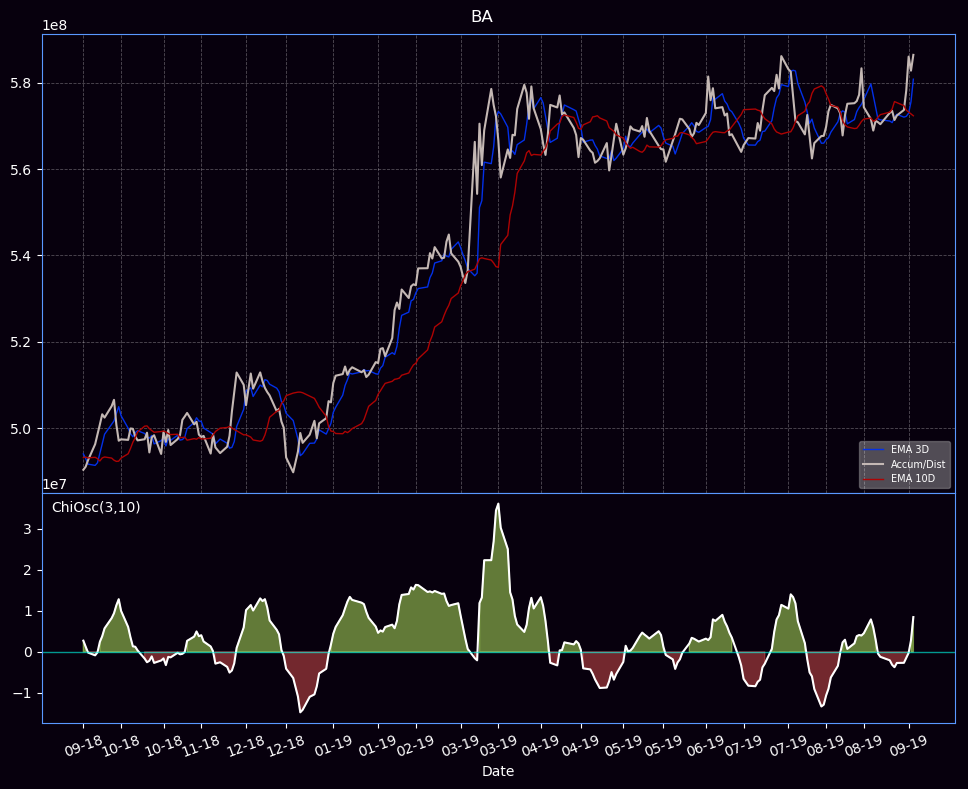


Time taken to run the code: 0.858



In [11]:

def chiOsc_plot(ticker,low = 3, high = 10, years = 1, months = 0, days = 0, verbose = True):
    '''
    Plot 2 graphs in the following order: 
    
    - Plots the Accumulation and Distribution line (ADL) of ticker's
    volume using functions in chaikin.ipynb
    
    - on the same axis, exponential moving average for low and high 
    timeframe are also plotted
    
    - On the second subplot, the chaikin oscillator is plotted
    
    Parameters
    ----------
    ticker: stock ticker
        to look up a stock on yahoo api
    high, low: integer 
        the timeframe for exponential_moving_average() which is set to 3
        and 10 as a default
    years, months, days: integer
        for the use of specified_prices() to give a specified timeframe 
        for plots  
    verbose: boolean 
        if my years>10, then if False, the graph will print everything it has
        for the prices.

    Returns
    -------
    ret : graph
        returns a graph and also saves the image in `plots/chiOsc_plots/ticker` folder
    '''
    
    
    if years>10 and verbose: 
        print('In get_data() method, I have only extracted data for the last 10 years, please change the above method for more historic data\nIf you would like to see all the prices plot, then make verbose = False')   
    
    ######## sorting out the data so that code is efficient and doesn't reload when not necessary #############
    else:
        if os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker),parse_dates=True,index_col=0)
            
            if not {'ADL','Chaikin Oscillator'}.issubset(df.columns):
                #chiOsc.ADL(ticker); #check chaikin_oscillator function - it already creates ADL column so dont need it
                chiOsc.chaikin_oscillator(ticker,time_frame = (low,high));
            else:
                print('{} data already saved in stock_dfs.'.format(ticker))
            
        else: 
            chiOsc.chaikin_oscillator(ticker,time_frame = (low,high));
            print('{} data now saved in stock_dfs folder.'.format(ticker))
            print('')
        
        print('Building graph for {}....\n'.format(ticker))
        
        ####################################
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker),parse_dates=True,index_col=0)
        
        adl = get.specified_prices(df['ADL'],years = years, months = months, days = days)
        ema_3 = get.exponential_moving_average(adl,window = low)
        ema_10 =get.exponential_moving_average(adl,window = high)
        chi_osc = get.specified_prices(chiOsc.chaikin_oscillator(ticker,time_frame = (low,high)),
                                       years = years, months = months, days = days)
        
        SP = np.count_nonzero(~np.isnan(ema_10.values))  #counting number of non NaN rows
        #date = emaS.index[ema_10-1]  #getting date of first non - NaN number

        #####################

        ################### Plotting begins ##########################
        mpl.rcParams.update(mpl.rcParamsDefault)
        mpl.rcParams.update({'font.size':10})

        fig = plt.figure(figsize=(11,8),facecolor='#07000d')  #,facecolor='#07000d'
        
        
        ######################## Plotting the ADL and EMA lines ###################
        ax1 = plt.subplot2grid((6,1),(0,0),rowspan = 4, colspan = 1,facecolor='#07000d')

        ax1.plot(ema_3.index[-SP:],ema_3[-SP:],linewidth=1,label = 'EMA {}D'.format(low),color = '#0230e8');
        ax1.plot(adl.index[-SP:],adl[-SP:],color = '#c4b8b4',linewidth=1.5, label = 'Accum/Dist');
        ax1.plot(ema_10.index[-SP:],ema_10[-SP:],linewidth=1, label = 'EMA {}D'.format(high),color='#ad0303');
        
        ax1.legend()
        
        maLeg = ax1.legend(loc = 4, ncol = 1, prop={'size':7},fancybox = True)  #loc = 4, prop={'size':7},fancybox = True
        maLeg.get_frame().set_alpha(0.3) #set the background of legend to shade
        textEd = pylab.gca().get_legend().get_texts()
        pylab.setp(textEd[0:5],color = 'w') #changing the colour of legend to white
    
        ax1.grid(True, color='w',linestyle='--', linewidth=0.6,alpha = 0.3)
        
        plt.setp(ax1.get_xticklabels(),visible = False)  #remove xaxis of ax1

        ax1.yaxis.label.set_color("w")
        ax1.tick_params(axis='y', colors='w')
        
        ax1.spines['bottom'].set_color("#5998ff")
        ax1.spines['top'].set_color("#5998ff")
        ax1.spines['left'].set_color("#5998ff")
        ax1.spines['right'].set_color("#5998ff")
        ##################################################
        
        ####################### Plotting the ChiOsc ##########################
        
        ax2 = plt.subplot2grid((6,1),(4,0),rowspan = 2, colspan = 2, sharex = ax1,facecolor='#07000d')
        ax2.plot(chi_osc.index[-SP:],chi_osc[-SP:], color = 'w',linewidth = 1.5, label = 'Chi_Osc({},{})'.format(low,high))
        ax2.axhline(y=0,color= '#00ffe8',alpha = 0.6,linestyle = '-',linewidth=1)
                
        posCol = '#e05050' #'#386d13'
        negCol = '#bdf464' # 'g' #'#8f2020'
            
        ax2.fill_between(chi_osc.index[-SP:],chi_osc[-SP:],0,where=(chi_osc[-SP:]>=0),facecolor = negCol,edgecolor=negCol,alpha = 0.5)
        ax2.fill_between(chi_osc.index[-SP:],chi_osc[-SP:],0,where=(chi_osc[-SP:]<=0),facecolor = posCol,edgecolor=posCol,alpha = 0.5)
        
        #ax2.grid(True, color='w',linestyle='--', linewidth=0.8,alpha = 0.3)
        
        ax2.xaxis_date()
        ax2.xaxis.set_ticks(chi_osc.index[np.arange(len(chi_osc)-SP, len(chi_osc), int(len(chi_osc)/20))])
        ax2.xaxis.set_major_formatter(mdates.DateFormatter("%m-%y"))

        ax2.yaxis.label.set_color("w")
        
        ax2.text(0.010,0.965,'ChiOsc({},{})'.format(low,high),va='top',color = 'w',transform = ax2.transAxes)
        
        ax2.tick_params(axis='y', colors='w')
        ax2.tick_params(axis='x', colors='w')
        
        ax2.spines['bottom'].set_color("#5998ff")
        ax2.spines['top'].set_color("#5998ff")
        ax2.spines['left'].set_color("#5998ff")
        ax2.spines['right'].set_color("#5998ff")
        
        ##############################
        
        plt.xticks(rotation=20);
        plt.xlabel("Date",color = 'w');

        plt.suptitle('{}'.format(ticker),color = 'w')

        fig.tight_layout()
        fig.subplots_adjust(left = 0.1,right = 0.93,top = 0.95,wspace = 0.2,hspace=0.0) 

        plt.show()

        if not os.path.exists('plots/chiOsc_plots'):  #if folder doesn't exists, this creates it
            os.makedirs('plots/chiOsc_plots')
        if not os.path.exists('plots/chiOsc_plots/{}'.format(ticker)): 
            os.makedirs('plots/chiOsc_plots/{}'.format(ticker))
        
        fig.savefig('plots/chiOsc_plots/{}/{}({}y,{}m,{}d).png'.format(ticker,ticker,years,months,days),facecolor = fig.get_facecolor(),format='png')  #dpi=1000

if __name__=='__main__':
    stock = input('Stock to chart: ')
    print('\n')
    start = timer()
    chiOsc_plot(stock,low = 3, high = 10, years = 1, months = 0, days = 0, verbose = True)
    
    end = timer()
    time_elapsed = end - start

    print('\nTime taken to run the code: {}\n'.format(round(time_elapsed,3)))

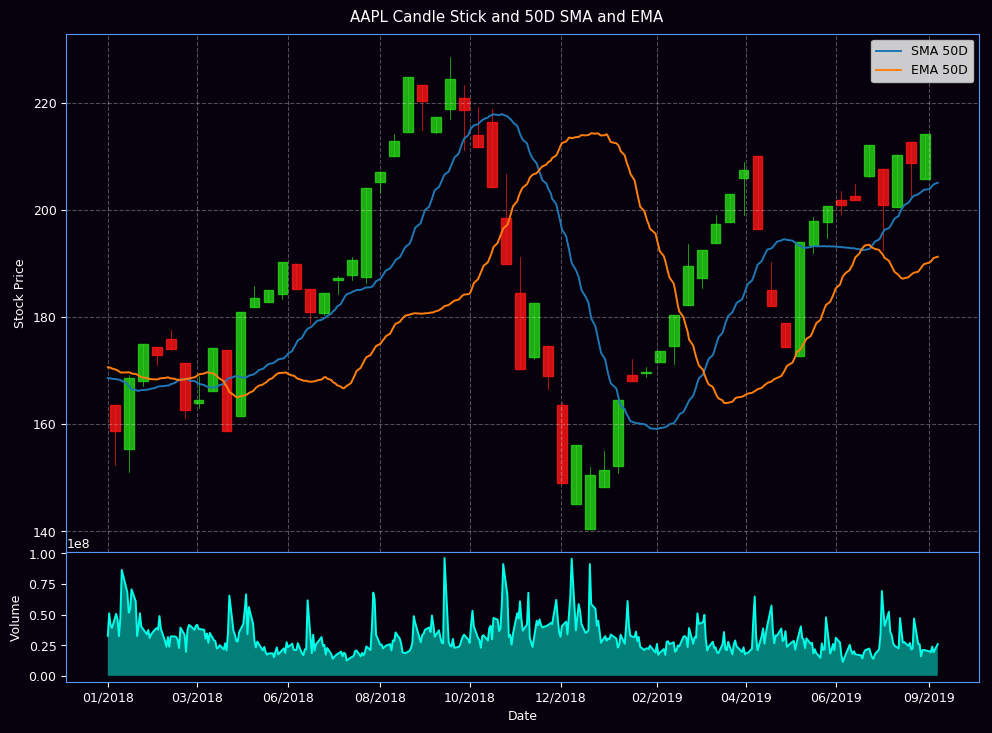


Time taken to run the code: 1.506



In [4]:


def candle_moving(ticker,window = 10, years = 0, months = 3, days = 0, verbose = True):
  if years>10 and verbose: 
    print('In get_data() method, I have only extracted data for the last 10 years, please change the above method for more historic data\nIf you would like to see all the prices plot, then make verbose = False')
   
  else:
    df = get.specified_prices(get.get_data(ticker),years=years,months=months,days=days)
    close = get.specified_prices(df['Adj Close'],years=years,months=months,days=days)
    volume = get.specified_prices(df['Volume'],years=years,months=months,days=days)
    
    sma = get.simple_moving_average(close,window = window)
    ema = get.exponential_moving_average(close, window = window)
    
    SP = np.count_nonzero(~np.isnan(ema.values))
    date = ema.index[window-1]
    
    df_ohlc = close.resample('10D').ohlc()[date:]
    df_ohlc.reset_index(inplace=True)
    df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

    mpl.rcParams.update(mpl.rcParamsDefault)  #to remove plt.style.use
    mpl.rcParams.update({'font.size':9})

    
    fig = plt.figure(figsize=(11,8),facecolor='#07000d') #
    #plt.style.use('ggplot')
    #plt.style.use('dark_background')
    ax1 = plt.subplot2grid((5,1),(0,0),rowspan = 4, colspan = 1,facecolor='#07000d')

    candlestick_ohlc(ax1,df_ohlc.values,width=7,colorup='#27d817',colordown = '#ff1717',alpha = 0.8);
    ax1.plot(df.index[-SP:],sma[-SP:],label = 'SMA {}D'.format(window),linewidth = 1.4)
    ax1.plot(df.index[-SP:],ema[-SP:],label = 'EMA {}D'.format(window),linewidth = 1.4)
    ax1.legend(fancybox = True)  #loc = 3, prop={'size':7},fancybox = True
    
    ax1.set_ylabel("Stock Price");
    
    ax1.grid(True, color='w', linestyle='--', linewidth=0.8,alpha = 0.3)
    
    ax1.yaxis.label.set_color("w")
    ax1.spines['bottom'].set_color("#5998ff")
    ax1.spines['top'].set_color("#5998ff")
    ax1.spines['left'].set_color("#5998ff")
    ax1.spines['right'].set_color("#5998ff")
    ax1.tick_params(axis='y', colors='w')
    #ax1.yaxis.set_ticks(df_ohlc[np.arange(0, len(df_ohlc), int(len(df_ohlc)/20))])
    plt.xticks(rotation=20);
    
    ax2 = plt.subplot2grid((5,1),(4,0),rowspan = 1, colspan = 1, sharex = ax1,facecolor = '#07000d')
    
    volumeMin = 0  #volume.min()
    
    ax2.plot(volume.index[-SP:],volume[-SP:],label = 'Volume',color = '#00ffe8',linewidth = 1.4)
    ax2.fill_between(volume.index[-SP:],volumeMin, volume[-SP:], facecolor = '#00ffe8',alpha=0.5)
    
    plt.xlabel("Date",color= 'w')
    #let's you adjust the stock prices ticks for x-axis for the dates [start,end,step]
    ax2.xaxis.set_ticks(volume.index[np.arange(len(volume)-SP, len(volume), int(len(volume)/10))]) 
    ax2.xaxis.set_major_formatter(mdates.DateFormatter("%m/%Y")) 
    ax2.set_ylabel('Volume')
    
    ax2.grid(False)
    ax2.yaxis.label.set_color("w")
    ax2.spines['bottom'].set_color("#5998ff")
    ax2.spines['top'].set_color("#5998ff")
    ax2.spines['left'].set_color("#5998ff")
    ax2.spines['right'].set_color("#5998ff")
    ax2.tick_params(axis='y', colors='w')
    ax2.tick_params(axis='x', colors='w')
    
    plt.suptitle('{} Candle Stick and {}D SMA and EMA'.format(ticker,window),color = 'w')
   
    fig.tight_layout()
    fig.subplots_adjust(left = 0.1,right = 0.93,top = 0.95,bottom = 0.14 ,wspace = 0.2,hspace=0.0) 

    plt.show()
    
    if not os.path.exists('plots/candle_moving'):  #if folder doesn't exists, this creates it
            os.makedirs('plots/candle_moving')
    if not os.path.exists('plots/candle_moving/{}'.format(ticker)): 
        os.makedirs('plots/candle_moving/{}'.format(ticker))
    
    fig.savefig('plots/candle_moving/{}/{}({}y,{}m,{}d).png'.format(ticker,ticker,years,months,days),facecolor = fig.get_facecolor(),format='png')  #dpi=1000

if __name__=='__main__':
    start = timer()
    candle_moving('AAPL',window = 50, years = 1, months = 10, days = 0,verbose = True)
    
    end = timer()
    time_elapsed = end - start

    print('\nTime taken to run the code: {}\n'.format(round(time_elapsed,3)))
    
#os.rmdir('Untitled Folder')
#os.remove('chi_osc.ipynb')
#os.makedirs('plots/candle_moving')

In [5]:
macd.computeMACD('AAPL').tail()

,MACD
Date,
2019-02-04,-16.476701
2019-02-05,-14.960610
2019-02-06,-14.246205
2019-02-07,-13.492819
2019-02-08,-11.820864


In [6]:
macd.macd_ema('AAPL').tail()

,MACD_EMA9
Date,
2019-02-04,-27.297140
2019-02-05,-27.157600
2019-02-06,-26.846000
2019-02-07,-26.319235
2019-02-08,-25.627699
